In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Statements

In [2]:
import json
import numpy as np
import pandas as pd
import requests

from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from pprint import pprint
from scipy.stats import linregress

## Bank Assets Data

In [3]:
bank_assets_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_asset = requests.get(bank_assets_url).json()

### Create Combined Data from the API response

In [4]:
# Create a list to hold the data of each financial asset
combined_asset_data = []

# loop through the data details of the dictionary 
for asset in bank_asset['data']:
        
        # For simplicity, let's assign assets' data component as asset 
        asset = asset['data']

        # Fetch all the relevant data elements from the each asset
        reporting_date = asset["REPDTE"]
        total_asset = asset["ASSET"]
        certificate = asset["CERT"]
        bank_name = asset["NAME"]
        cash_balance = asset["CHBAL"]
        securities = asset["SC"]
        federal_repurchase_option_rate = asset["FREPO"]
        net_loans_leases = asset["LNLSNET"]
        real_estate_loan = asset["LNRE"]
        bank_premises_fixed_asset = asset["BKPREM"]
        other_real_estate_owned = asset["ORE"]
        good_will_other_intangibles = asset["INTAN"]
        all_other_assets = asset["AOA"]
        
        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_asset_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Total Asset": total_asset,
            "Cash and Balances due from Depository Institutions": cash_balance,
            "Securities": securities,
            "Federal Funds Sold & Reverse Repurchase Agreements": federal_repurchase_option_rate,
            "Net Loans Lease": net_loans_leases,
            "All Real Estate Loans": real_estate_loan,
            "Bank Premises and Fixed Assets": bank_premises_fixed_asset,
            "Other Real Estate Owned": other_real_estate_owned,
            "Goodwill and Other Intangibles": good_will_other_intangibles,
            "All Other Asset": all_other_assets
        })

### Convert the Combined Data into a Pandas DataFrame

In [5]:
# Create bank assets dataframe from the combined assets data           
bank_assets_df = pd.DataFrame(combined_asset_data)

# Convert 'Reporting Date' column to datetime64
bank_assets_df['Reporting Date'] = pd.to_datetime(bank_assets_df['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
bank_assets_df = bank_assets_df.sort_values('Reporting Date')

# Reset the index
bank_assets_df = bank_assets_df.reset_index(drop=True)

# Display bank assets dataframe 
bank_assets_df.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899


## Part 1: 

- a) Create stacked bar chart
- b) Liquidity ration
- c) Pie chart analysis of current asset vs. non-current

#### Current asset = Cash and balances due from depository institutions + securities

In [6]:
bank_assets_df["Current Asset"] = bank_assets_df["Cash and Balances due from Depository Institutions"] + bank_assets_df["Securities"]

#### Curret Asset Ratio =  Current Asset  / Total Asset

In [7]:
bank_assets_df["Curret Asset Ratio"] = bank_assets_df["Current Asset"] / bank_assets_df["Total Asset"]

#### Display the Bank Assets DataFrame with new changes

In [8]:
bank_assets_df.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000,426830000,0.316677
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000,44086000,0.384383
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172,465634989,0.322218
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000,518862000,0.286217
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899,3906157,0.126058


In [9]:
# Total assets = Cash and balances due from depository institutions + securities + Net Loans and leases + Other Real Estates Owned + Goodwill and other Intangibles
# Current asset = Cash and balances due from depository institutions + securities
# Create dataframe of each bank of the current asset vs. total asset

In [10]:
# Create a stack bar chart with the compositon of the asset.
# Total Asset = Cash and Balances due from Depository Institutions + Securities + Net Loans Lease + Federal funds sold & revenue repurchase agreements + Trading account assets + Banking premises and fixed assets + Other real estate owned+ Goodwill and other intangibles + All other assets

### Asset Ratio Over Time vs Reporting Date 

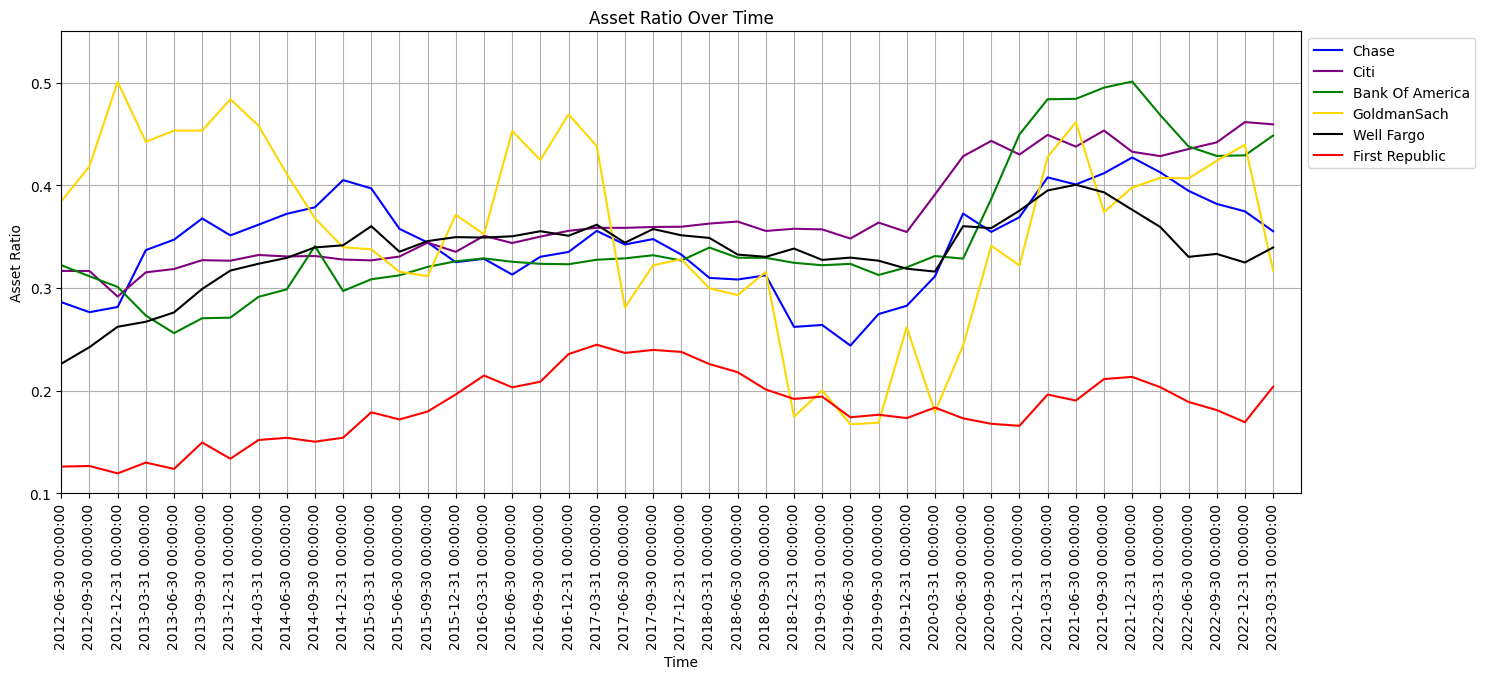

In [12]:
# Plot current asset ratio over time for the six banks, time=np.arange(1, len(new_bank_asset["Reporting Date"].unique()) + 1, 1)
plt.figure(figsize=(16, 6))
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# time
Chase, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic, = plt.plot(x_axis, bank_assets_df.loc[(bank_assets_df["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, bank_assets_df["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

### Net Loans Lease Over Time vs Reporting Date

In [14]:
# Define a function to format y-axis labels
def format_y_axis_labels(value, _):
    if value >= 1000:
        value = f"{int(value/1000)}K"
    return value

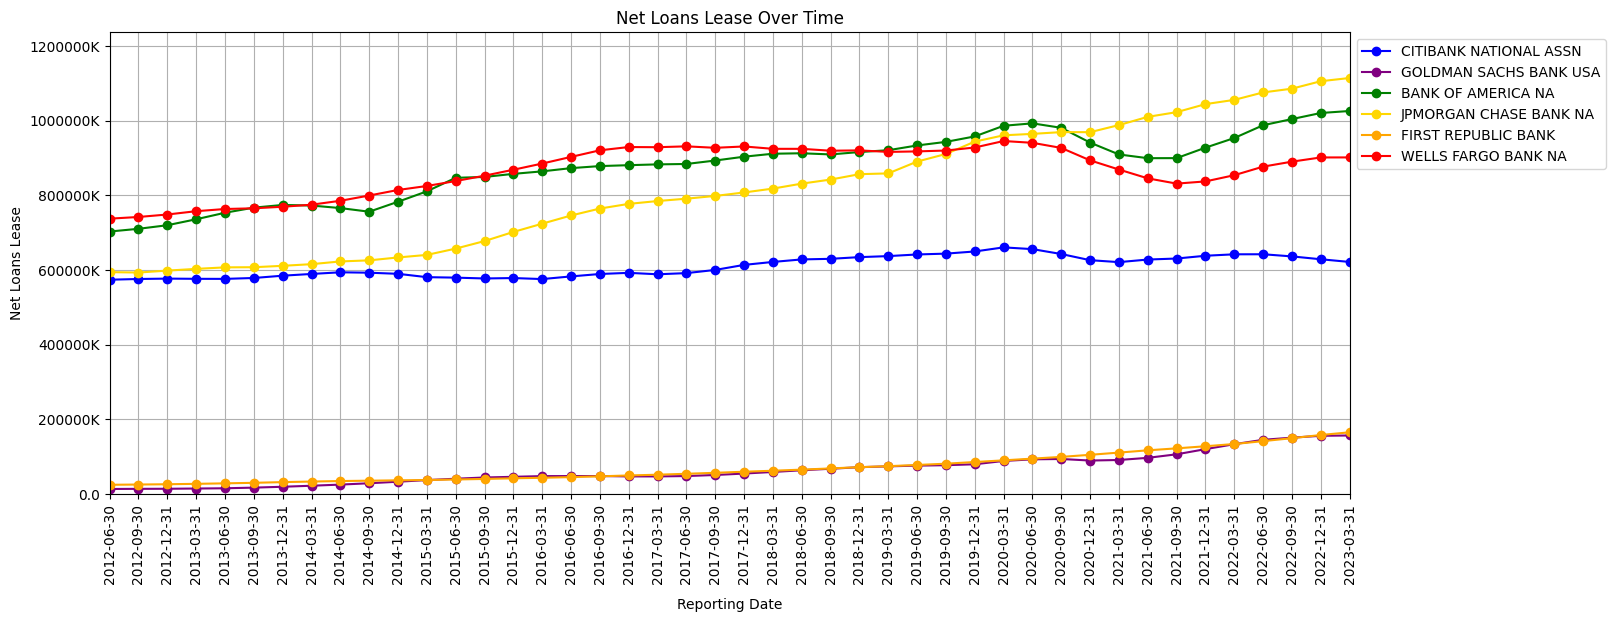

In [38]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Net Loans Lease"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Lease Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Lease")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["Net Loans Lease"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### All Real Estate Loans vs Reporting Date

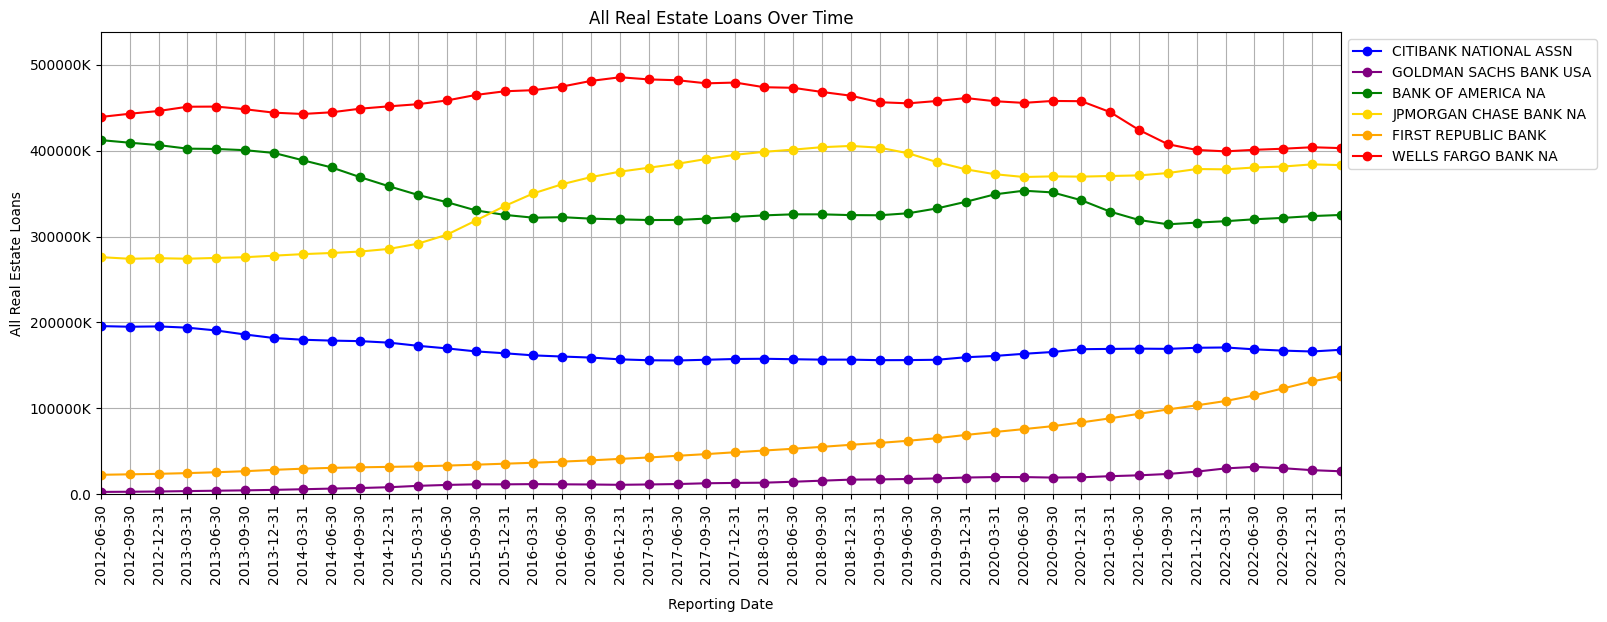

In [17]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "All Real Estate Loans"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("All Real Estate Loans Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("All Real Estate Loans")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["All Real Estate Loans"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Bank Premises and Fixed Assets vs Reporting Date

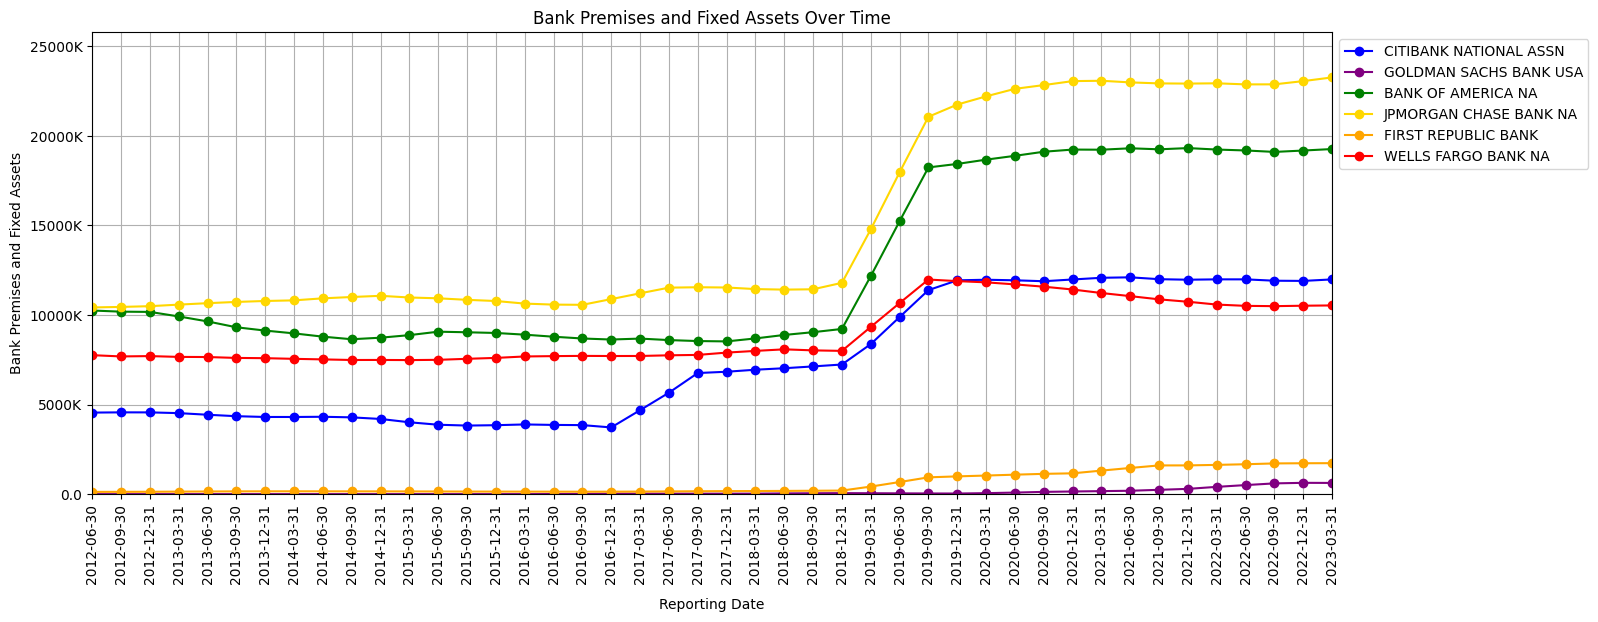

In [19]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Bank Premises and Fixed Assets"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Bank Premises and Fixed Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Bank Premises and Fixed Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["Bank Premises and Fixed Assets"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Other Real Estate Owned vs Reporting Date

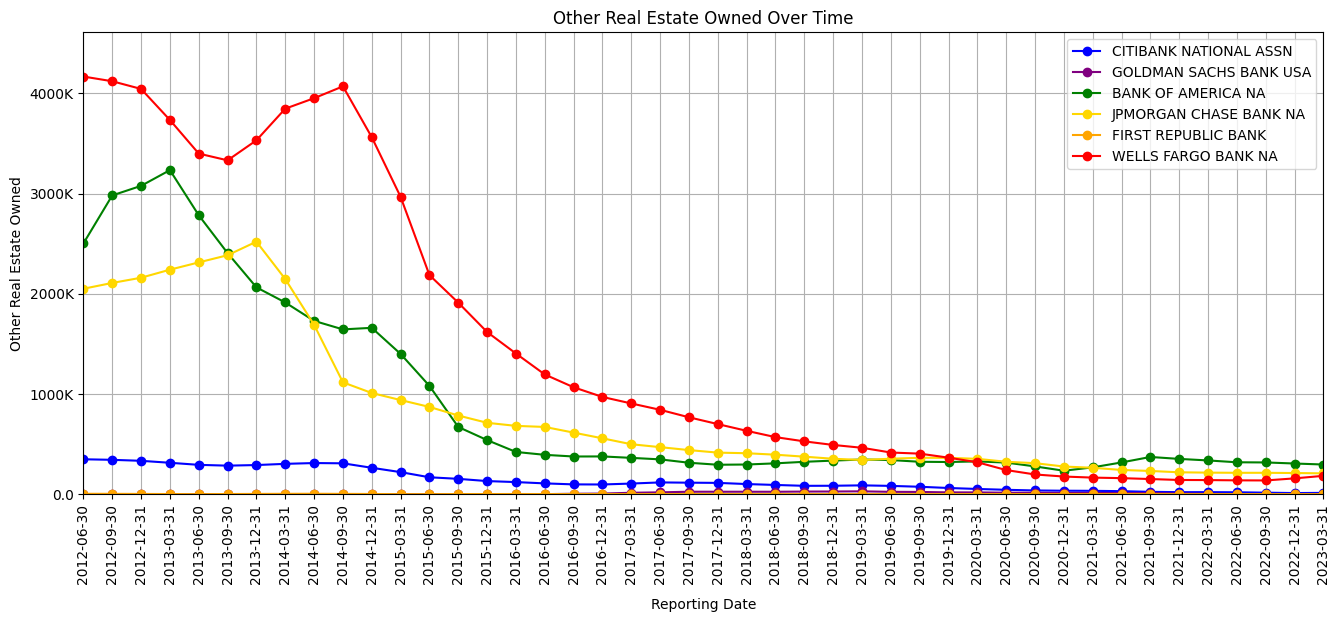

In [20]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Other Real Estate Owned"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Other Real Estate Owned Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Other Real Estate Owned")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["Other Real Estate Owned"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Goodwill and Other Intangibles vs Reporting Date

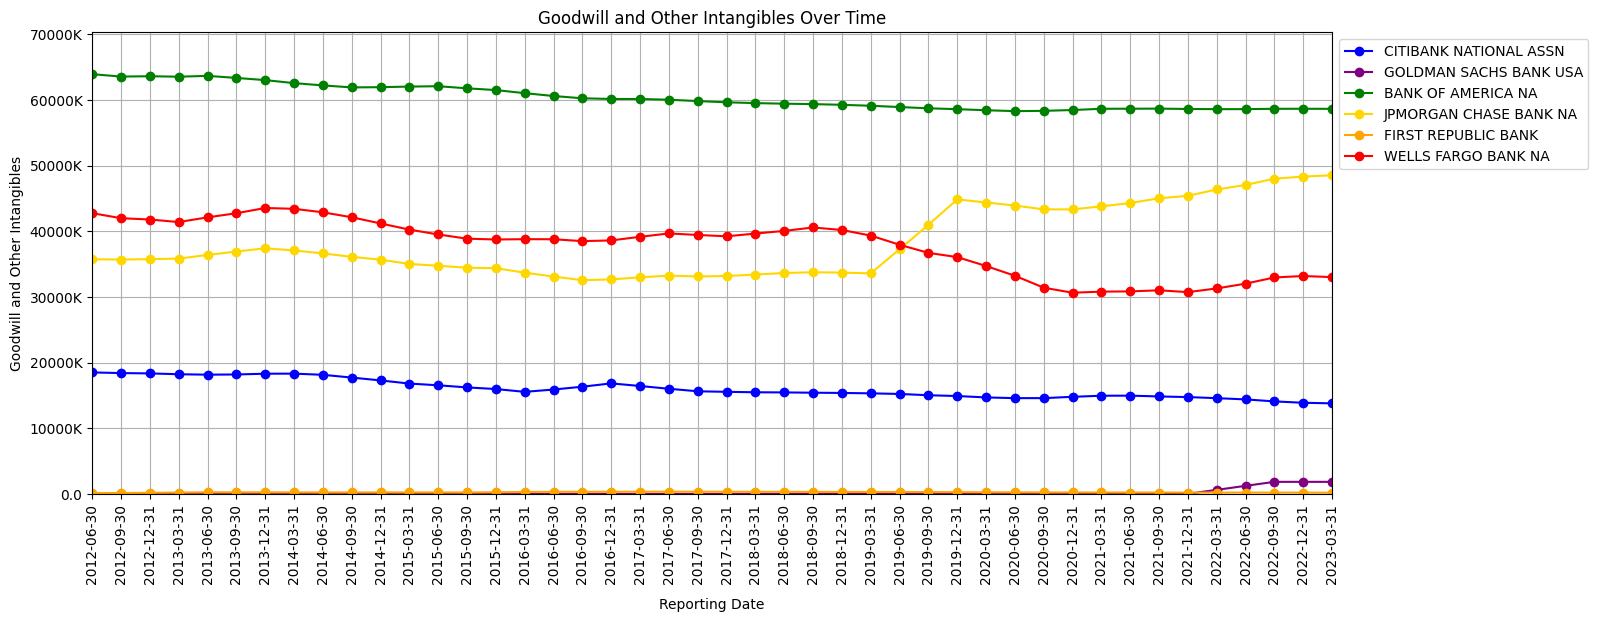

In [21]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Goodwill and Other Intangibles"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Goodwill and Other Intangibles Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Goodwill and Other Intangibles")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["Goodwill and Other Intangibles"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### All Other Asset vs Reporting Date

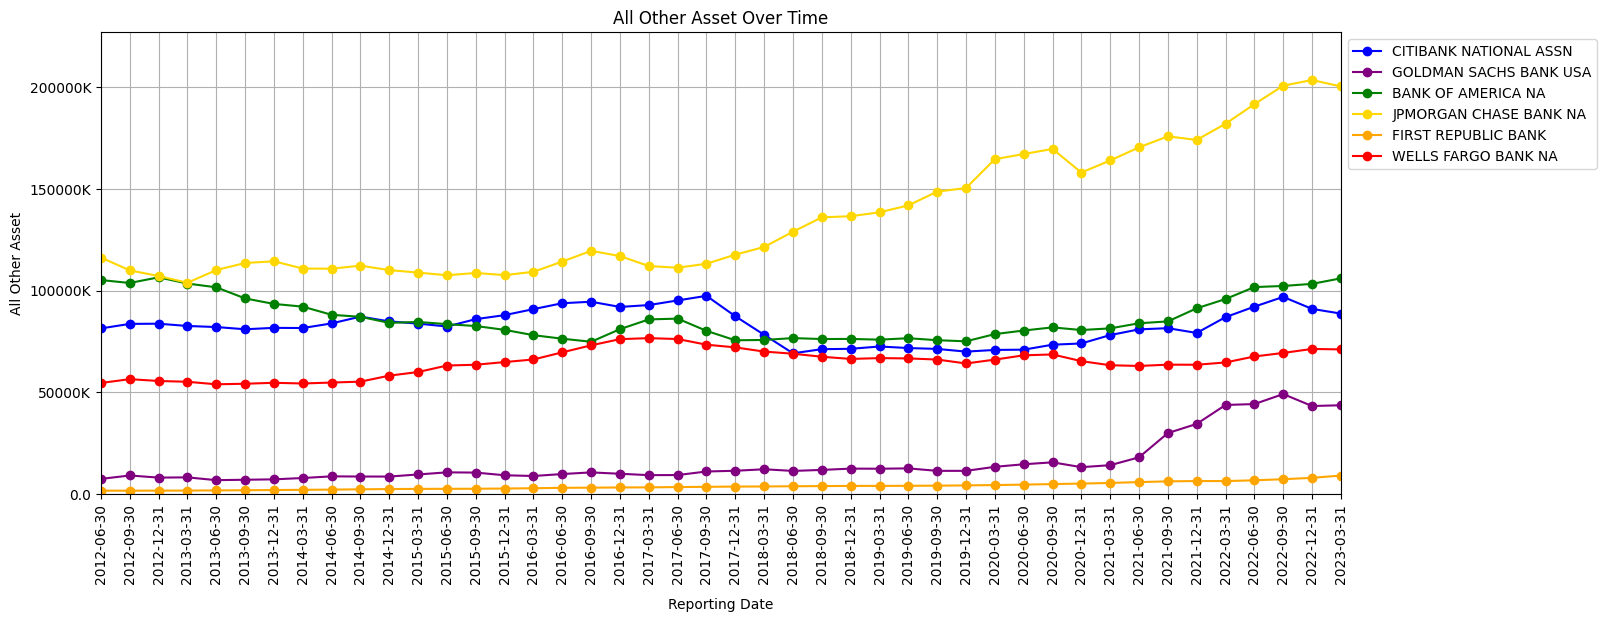

In [22]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "All Other Asset"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("All Other Asset Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("All Other Asset")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["All Other Asset"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Current Asset vs Reporting Date

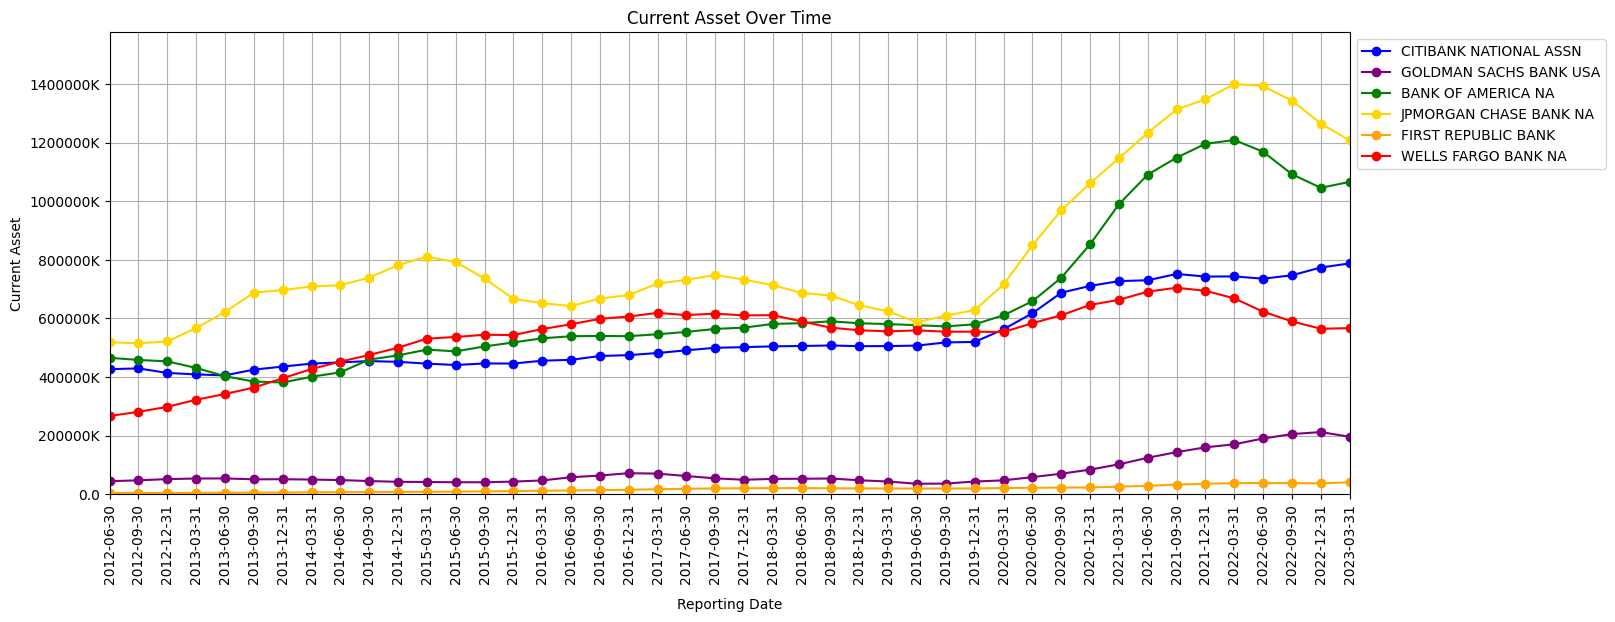

In [23]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Current Asset"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Current Asset Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Current Asset")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_assets_df["Current Asset"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Curret Asset Ratio vs Reporting Date

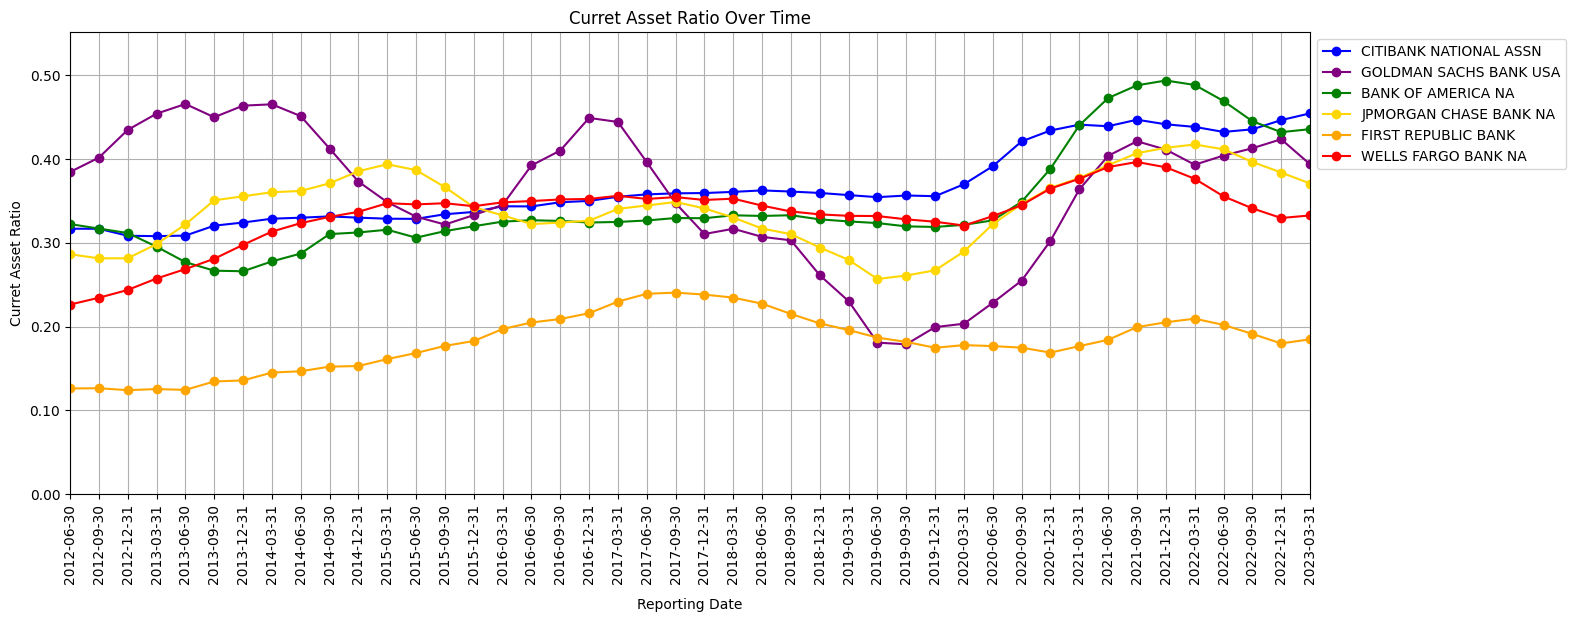

In [25]:
# Get the list of unique banks
bank_names = bank_assets_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_assets_df.loc[bank_assets_df["Bank Name"] == bank, "Curret Asset Ratio"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Curret Asset Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Curret Asset Ratio")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))  # Display two decimal places

# Set y-axis limits
max_value = bank_assets_df["Curret Asset Ratio"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Create a pie chart of the Chase's avg current asset and other assets

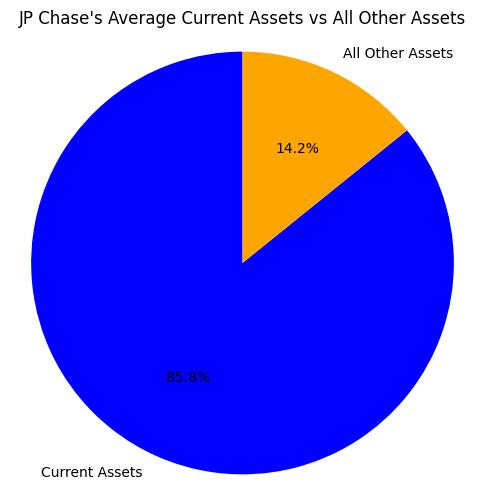

In [28]:
# Calculate average current asset and other assets for JP Chase
chase_filter = (bank_assets_df["Bank Name"] == "JPMORGAN CHASE BANK NA")
jp_chase_current_asset_avg = bank_assets_df.loc[chase_filter, "Current Asset"].mean()
jp_chase_other_assets_avg = bank_assets_df.loc[chase_filter, "All Other Asset"].mean()

# Create data for the pie chart
sizes = [jp_chase_current_asset_avg, jp_chase_other_assets_avg]
labels = ["Current Assets", "All Other Assets"]
colors = ["blue", "orange"]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title("JP Chase's Average Current Assets vs All Other Assets")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

## Bank Liabilities Data

In [54]:
bank_liabilites_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_liabilites = requests.get(bank_liabilites_url).json()

### Create Combined Data from the API response

In [55]:
# Create a list to hold the data of each financial liabilites
combined_liabilites_data = []

for liability in bank_liabilites['data']:
    
        # For simplicity, let's assign liability' data component as liability 
        liability = liability['data']
        
        reporting_date = liability["REPDTE"]
        certificate = liability["CERT"]
        bank_name = liability["NAME"]
        total_liabilites_and_capitals = liability["LIABEQ"]
        total_liabilities = liability["LIAB"]
        total_deposit = liability["DEP"]
        total_deposits_in_domestic_offices = liability["DEPDOM"]
        total_deposits_in_foreign_offices = liability["DEPFOR"]
        all_other_liabilities = liability["ALLOTHL"]
        total_equity_capital = liability["EQTOT"]
        federal_repurchase_option_rate = liability["FREPP"]
        trading_liabilities = liability["TRADEL"]
        other_borrowed_funds = liability["OTHBRF"]

        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_liabilites_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Total Liabilites and capitals": total_liabilites_and_capitals,
            "Total Liabilites":total_liabilities,
            "Total Deposit": total_deposit,
            "Total Domestic Deposit": total_deposits_in_domestic_offices,
            "Total Foreign Deposit": total_deposits_in_foreign_offices,
            "All other Liabilities": all_other_liabilities,
            "Total EquityCapital": total_equity_capital,
            "Federal funds purchased and repurchase agreements": federal_repurchase_option_rate,
            "Trading Liabilites": trading_liabilities,
            "Other borrowed funds": other_borrowed_funds
        })

### Convert the Combined Data into a Pandas DataFrame

In [56]:
# Create bank liabilites dataframe from the combined liabilites data           
bank_liabilites_df = pd.DataFrame(combined_liabilites_data)

# Convert 'Reporting Date' column to datetime64
bank_liabilites_df['Reporting Date'] = pd.to_datetime(bank_liabilites_df['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
bank_liabilites_df = bank_liabilites_df.sort_values('Reporting Date')

# Reset the index
bank_liabilites_df = bank_liabilites_df.reset_index(drop=True)

# Display bank assets dataframe 
bank_liabilites_df.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,1192463000,950510000,386149000,564361000.0,56476000,155378000,21726000,60983000,102768000
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,94738000,53774000,53774000,0.0,9878000,19955000,16745000,13822000,519000
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,1265806391,1062273625,991685005,70588620.0,25374938,179286766,80222077,40184413,39536551
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,1676378000,1162998000,832455000,330543000.0,80160000,136447000,188478000,128307000,87465000
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,27930388,24215303,24215303,NaN,431367,3056613,0,15791,3203581


## Bank Performance 

In [40]:
bank_performance_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_performace = requests.get(bank_performance_url).json()

### Create Combined Data from the API response

In [41]:
# Create a list to hold the data of each bank performances
combined_performance_data = []

for performace in bank_performace['data']:
    
        # For simplicity, let's assign liability' data component as liability 
        performace = performace['data']
        
        reporting_date = performace["REPDTE"]
        certificate = performace["CERT"]
        bank_name = performace["NAME"]
        net_interest_margin = performace["NIMY"]
        return_on_assets = performace["ROA"]
        return_on_equity = performace["ROE"]
        efficiency_ratio = performace["EEFFR"]
        net_loans_leases_to_assets = performace["LNLSNTV"]
        net_loans_leases_to_deposits = performace["LNLSDEPR"]
        net_loans_leases_to_core_deposit = performace["IDLNCORR"]
        domestic_deposits_to_total_assets = performace["DEPDASTR"]
        tier_1_risk_based_capital_ratio = performace["IDT1RWAJR"]
        
        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_performance_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Net Interest Margin": net_interest_margin,
            "Return on Assets": return_on_assets,
            "Return on Equity": return_on_equity,
            "Efficiency Ratio": efficiency_ratio,
            "Net Loans Leases to Assets": net_loans_leases_to_assets,
            "Net Loans Leases to Deposits": net_loans_leases_to_deposits,
            "Net Loans Leases to CoreDeposit": net_loans_leases_to_core_deposit,
            "Domestic Deposits to Total Assets": domestic_deposits_to_total_assets,
            "Tier 1 Risk Based Capital Ratio": tier_1_risk_based_capital_ratio
        })

### Convert the Combined Data into a Pandas DataFrame

In [42]:
# Create bank performances dataframe from the combined liabilites data           
bank_performances_df = pd.DataFrame(combined_performance_data)

# Convert 'Reporting Date' column to datetime64
bank_performances_df['Reporting Date'] = pd.to_datetime(bank_performances_df['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
bank_performances_df = bank_performances_df.sort_values('Reporting Date')

# Reset the index
bank_performances_df = bank_performances_df.reset_index(drop=True)

# Display bank assets dataframe 
bank_performances_df.head()

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to CoreDeposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,3.801293,0.910206,7.77,57.158555,42.58,60.385372,184.903162,28.65,15.240706
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,0.594831,1.314566,7.16,29.320988,12.04,25.681556,58.566582,46.89,18.345798
2,2012-06-30,BANK OF AMERICA NA,3510,2.657255,0.952095,7.78,64.680503,48.64,66.173522,74.325034,68.62,12.863604
3,2012-06-30,JPMORGAN CHASE BANK NA,628,2.323562,0.683181,9.32,79.750202,32.78,51.100948,75.544175,45.92,9.121593
4,2012-06-30,FIRST REPUBLIC BANK,59017,4.203551,1.285897,13.56,50.839580,80.79,103.384703,107.527984,78.15,13.680957


### Net Loans Leases to Assets Over Time vs Reporting Date

In [14]:
# Define a function to format y-axis labels
def format_y_axis_labels(value, _):
    if value >= 1000:
        value = f"{int(value/1000)}K"
    return value

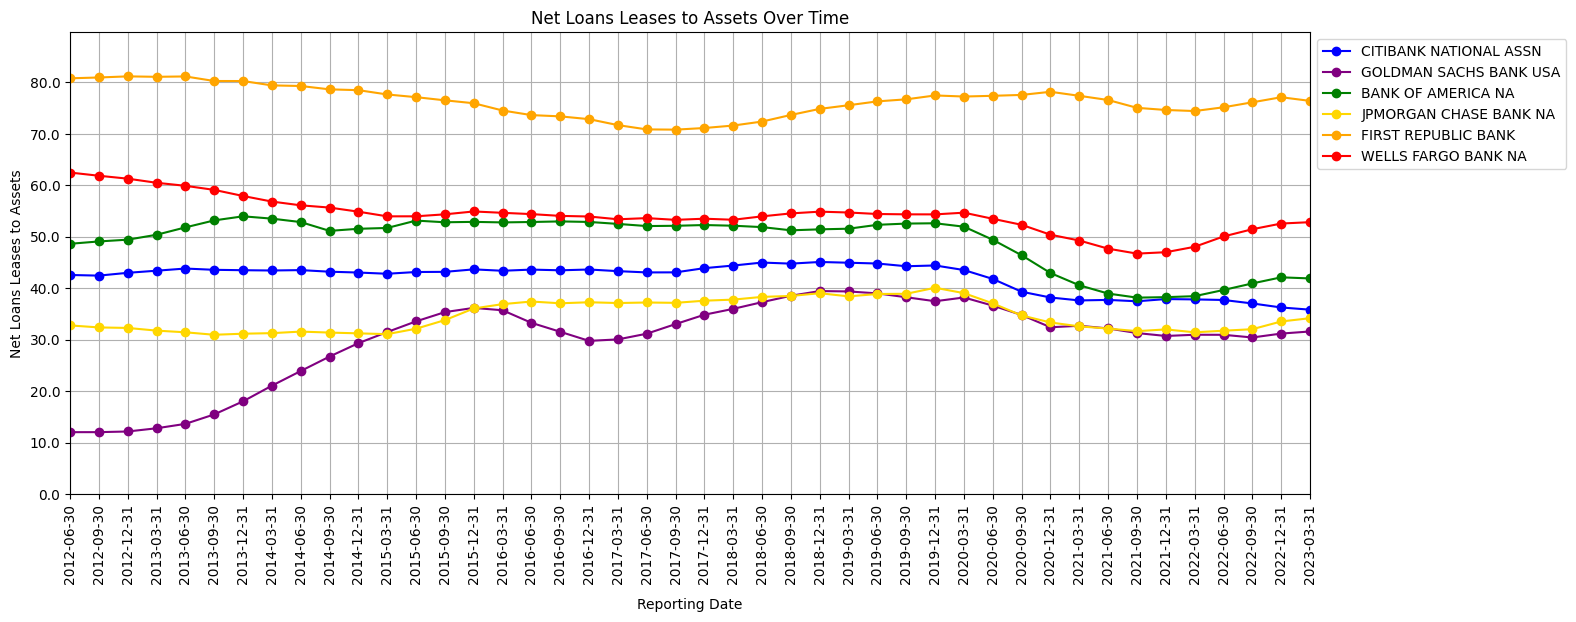

In [43]:
# Get the list of unique banks
bank_names = bank_performances_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_performances_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_performances_df.loc[bank_performances_df["Bank Name"] == bank, "Net Loans Leases to Assets"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_performances_df["Net Loans Leases to Assets"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Net Loans Leases to Deposits Over Time vs Reporting Date

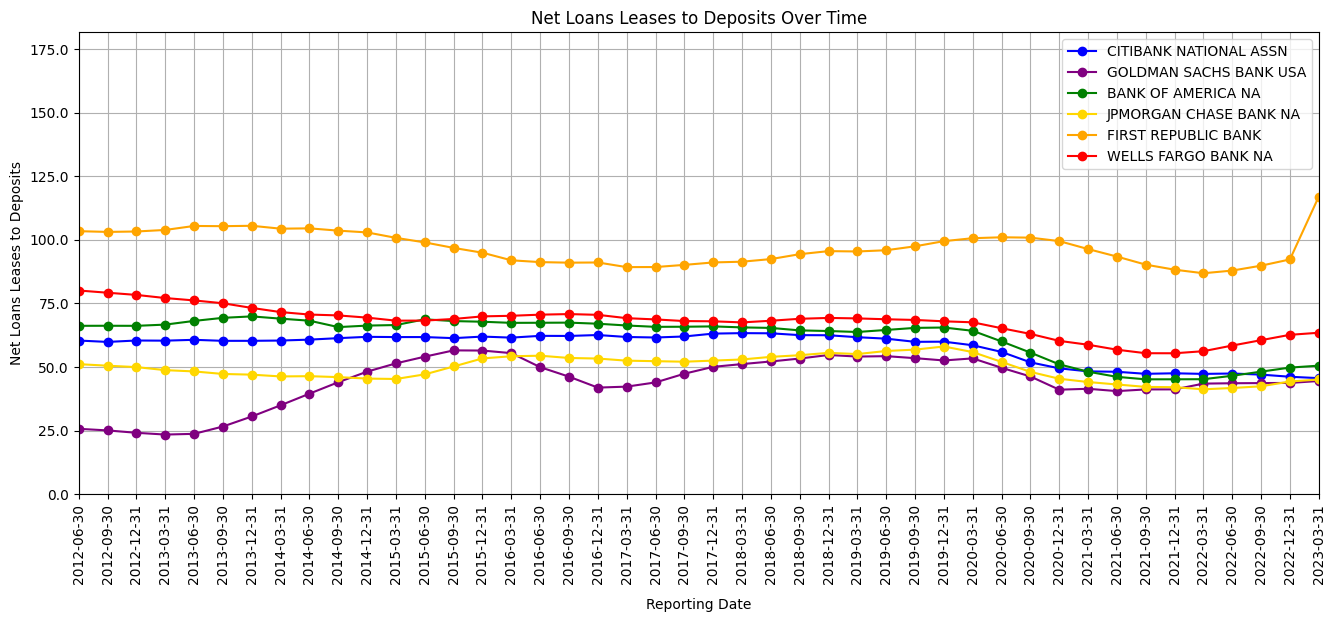

In [47]:
# Get the list of unique banks
bank_names = bank_performances_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_performances_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_performances_df.loc[bank_performances_df["Bank Name"] == bank, "Net Loans Leases to Deposits"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Deposits Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Deposits")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_performances_df["Net Loans Leases to Deposits"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Net Loans Leases to CoreDeposit Over Time vs Reporting Date

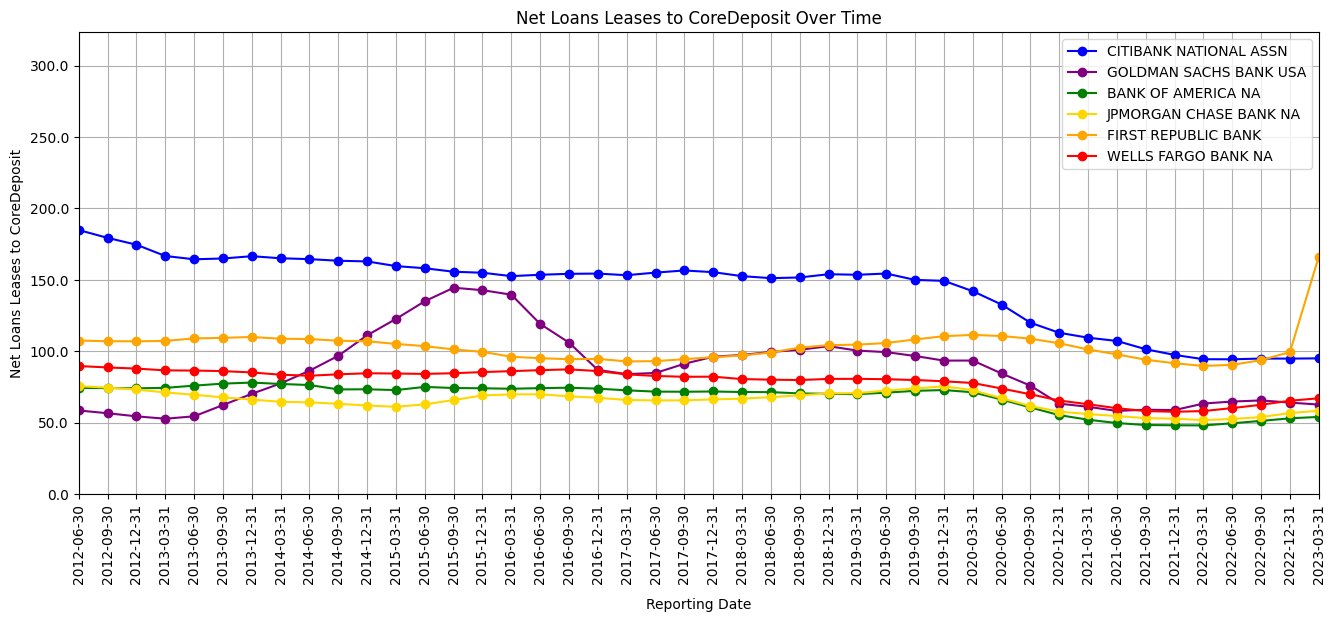

In [48]:
# Get the list of unique banks
bank_names = bank_performances_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_performances_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_performances_df.loc[bank_performances_df["Bank Name"] == bank, "Net Loans Leases to CoreDeposit"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to CoreDeposit Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to CoreDeposit")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_performances_df["Net Loans Leases to CoreDeposit"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Domestic Deposits to Total Assets Over Time vs Reporting Date

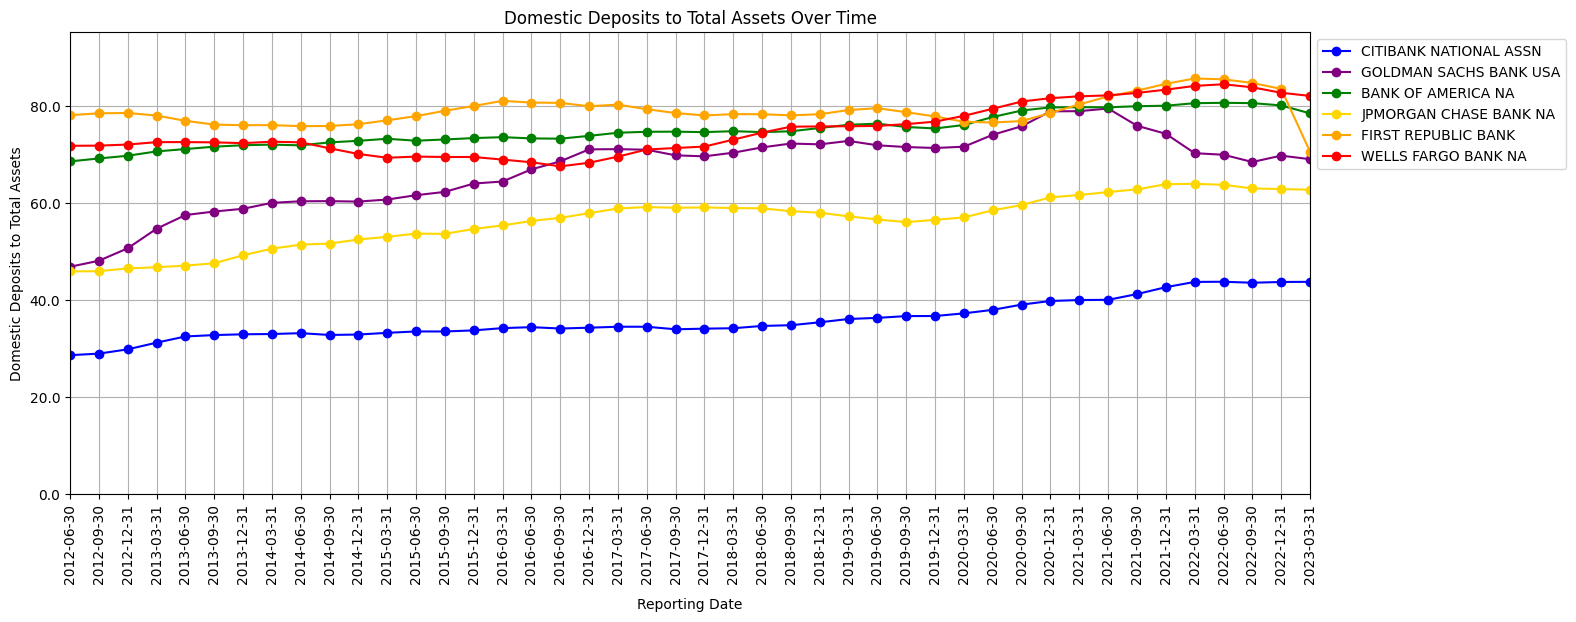

In [49]:
# Get the list of unique banks
bank_names = bank_performances_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_performances_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_performances_df.loc[bank_performances_df["Bank Name"] == bank, "Domestic Deposits to Total Assets"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Domestic Deposits to Total Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Domestic Deposits to Total Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_performances_df["Domestic Deposits to Total Assets"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Tier 1 Risk Based Capital Ratio Over Reporting Date

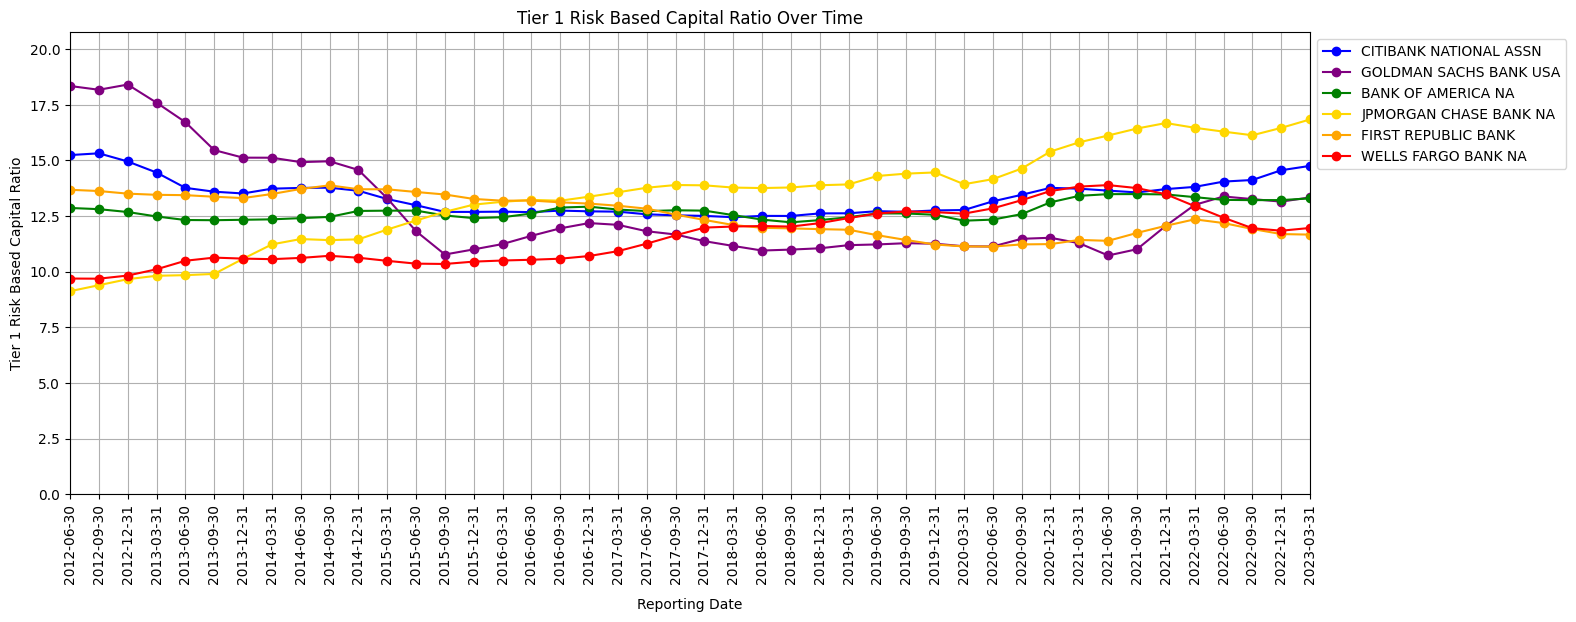

In [50]:
# Get the list of unique banks
bank_names = bank_performances_df["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_performances_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_performances_df.loc[bank_performances_df["Bank Name"] == bank, "Tier 1 Risk Based Capital Ratio"]
    smoothed_data = data.rolling(window=3, min_periods=1).mean()  # Apply smoothing with a window of 3
    plt.plot(x_axis, smoothed_data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_assets_df["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Tier 1 Risk Based Capital Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Tier 1 Risk Based Capital Ratio")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_performances_df["Tier 1 Risk Based Capital Ratio"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

## Bank Correlation

In [29]:
x_axis = np.arange(len(bank_assets_df["Reporting Date"].unique()))

In [45]:
# Read the original CSV file of consumer sentiment index
consumer_index_df = pd.read_csv("Resources/us_csi_original.csv")

# Convert 'Date' column to datetime64
consumer_index_df['DATE'] = pd.to_datetime(consumer_index_df['DATE'])

# Rename the header of column and reset index
consumer_index_df = consumer_index_df.rename(columns = {"DATE": "Reporting Date", "UMCSENT" : "Consumer Sentiment Index"})

# Formatting consumer sentiment index
consumer_index_df["Consumer Sentiment Index"] = consumer_index_df["Consumer Sentiment Index"].map("{:,.3f}".format)

# Display consumer index dataframe
consumer_index_df.head()

,Reporting Date,Consumer Sentiment Index
0,2012-04-01,76.300
1,2012-07-01,74.967
2,2012-10-01,79.400
3,2013-01-01,76.667
4,2013-04-01,81.667


### Correlation Graph: Bank Assets Dataset (Net loans and leases)

In [65]:
bank_assets_df.head(2)

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000,426830000,0.316677
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000,44086000,0.384383


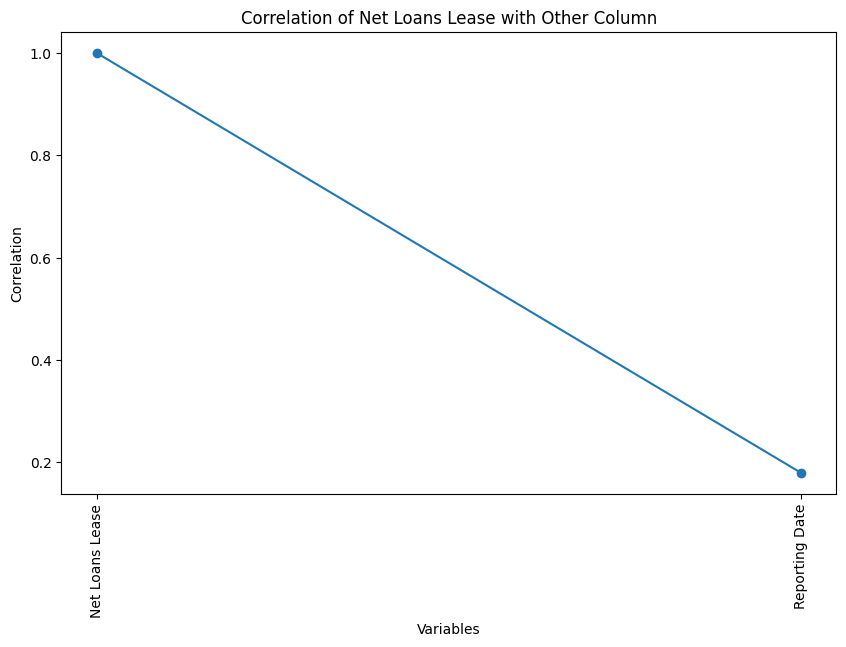

In [64]:
# Convert "Net Loans Lease" column to numeric
bank_assets_df["Net Loans Lease"] = pd.to_numeric(bank_assets_df["Net Loans Lease"], errors="coerce")

# Specify the columns for correlation calculation
columns_to_correlate = ["Net Loans Lease", "Reporting Date"]

# Calculate the correlation matrix for the specified columns
correlation_matrix = bank_assets_df[columns_to_correlate].corr()

# Plot the correlation graph
plt.figure(figsize=(10, 6))
plt.plot(correlation_matrix.index, correlation_matrix["Net Loans Lease"], marker="o")

plt.title("Correlation of Net Loans Lease with Reporting Date")
plt.xlabel("Variables")
plt.ylabel("Correlation")

plt.xticks(rotation=90)
plt.show()

- In the graph, a line is plotted to show the correlation coefficient for each variable against the "Net Loans Lease" variable. 
- A negative slope in the first quadrant indicates a negative correlation, meaning that as the values of the "Net Loans Lease" variable increase, the values of the Reporting Date decrease, and vice versa.

### Correlation Graph: Bank Liability Dataset (Deposit held in domestic offices - Total Domestic Deposit)

In [66]:
bank_liabilites_df.head(2)

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,1192463000,950510000,386149000,564361000.0,56476000,155378000,21726000,60983000,102768000
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,94738000,53774000,53774000,0.0,9878000,19955000,16745000,13822000,519000


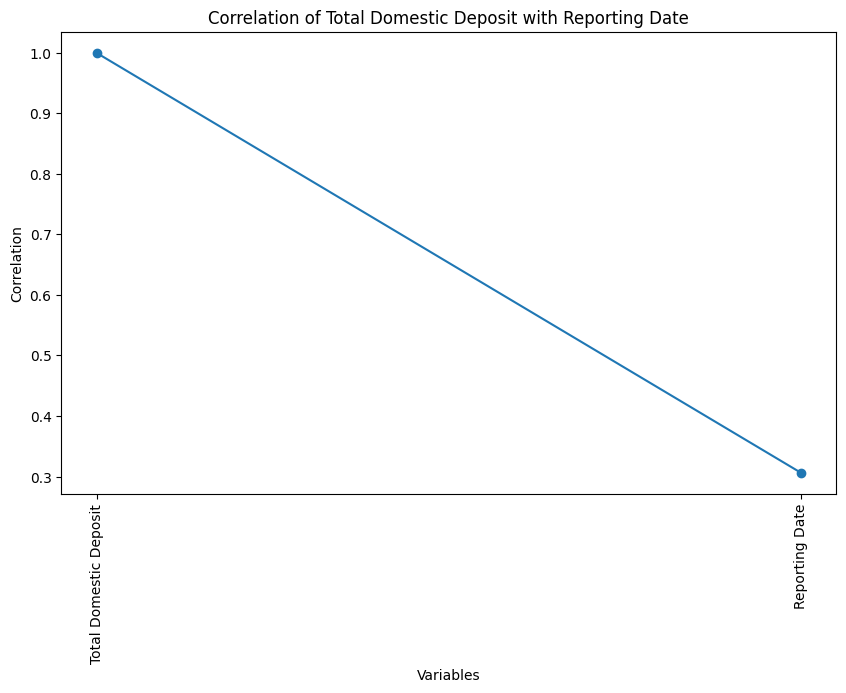

In [67]:
# Convert "Net Loans Lease" column to numeric
bank_liabilites_df["Total Domestic Deposit"] = pd.to_numeric(bank_liabilites_df["Total Domestic Deposit"], errors="coerce")

# Specify the columns for correlation calculation
columns_to_correlate = ["Total Domestic Deposit", "Reporting Date"]

# Calculate the correlation matrix for the specified columns
correlation_matrix = bank_liabilites_df[columns_to_correlate].corr()

# Plot the correlation graph
plt.figure(figsize=(10, 6))
plt.plot(correlation_matrix.index, correlation_matrix["Total Domestic Deposit"], marker="o")

plt.title("Correlation of Total Domestic Deposit with Reporting Date")
plt.xlabel("Variables")
plt.ylabel("Correlation")

plt.xticks(rotation=90)
plt.show()

- In the graph, a line is plotted to show the correlation coefficient for each variable against the "Total Domestic Deposit" variable. 
- A negative slope in the first quadrant indicates a negative correlation, meaning that as the values of the "Total Domestic Deposit" variable increase, the values of the Reporting Date decrease, and vice versa.